# Import libraries 




In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

Read the file

In [2]:
data=pd.read_csv("C:/Users/User/Downloads/dataset.csv")

# Exploratory Data Analysis

In [3]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [4]:
data.shape

(461, 17)

In [5]:
print('The dataset contains {} rows and {} columns. The number of rows represent the number of players and 38 is the number of features.'.format(data.shape[0],data.shape[1]))

The dataset contains 461 rows and 17 columns. The number of rows represent the number of players and 38 is the number of features.


In [6]:
data.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [7]:
data.info

<bound method DataFrame.info of                     name      club  age position  position_cat  market_value  \
0         Alexis Sanchez   Arsenal   28       LW             1          65.0   
1             Mesut Ozil   Arsenal   28       AM             1          50.0   
2              Petr Cech   Arsenal   35       GK             4           7.0   
3           Theo Walcott   Arsenal   28       RW             1          20.0   
4      Laurent Koscielny   Arsenal   31       CB             3          22.0   
..                   ...       ...  ...      ...           ...           ...   
456  Edimilson Fernandes  West+Ham   21       CM             2           5.0   
457       Arthur Masuaku  West+Ham   23       LB             3           7.0   
458            Sam Byram  West+Ham   23       RB             3           4.5   
459      Ashley Fletcher  West+Ham   21       CF             1           1.0   
460         Diafra Sakho  West+Ham   27       CF             1          10.0   

     pa

In [8]:
data['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [9]:
data.isna().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [10]:
data=data.dropna()
data.shape

(460, 17)

In [11]:
dataCorr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['market_value'],columns=['Correlation to the target'])
dataCorr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
market_value,1.000000
fpl_value,0.789373
page_views,0.739540
fpl_points,0.615013
big_club,0.593249
new_signing,0.130970
region,0.101659
new_foreign,0.097896
club_id,-0.046486
age_cat,-0.118746


In [12]:
data.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.00000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,26.815217,2.182609,11.024022,765.315217,5.446739,57.43913,1.993478,0.034783,3.208696,10.339130,0.304348,0.145652
std,3.959846,0.999631,12.268045,932.233794,1.347915,53.10415,0.957689,0.183428,1.279949,5.731672,0.460632,0.353141
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.750000,4.500000,5.00000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.00000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,900.000000,5.500000,94.00000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.00000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [13]:
data[data["market_value"]>55]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2.0,Belgium,0,3,5,1,0
240,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,17.50%,199,2.0,Belgium,0,3,11,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3.0,Argentina,0,4,11,1,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
377,Harry Kane,Tottenham,23,CF,1,60.0,4161,12.5,35.10%,224,1.0,England,0,2,17,1,0


In [14]:
input = data.drop(columns=["name","club","age","nationality","position","club_id","market_value","fpl_sel"])
output= data["market_value"]

In [15]:
input

,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,big_club,new_signing
0,1,4329,12.0,264,3.0,0,4,1,0
1,1,4395,9.5,167,2.0,0,4,1,0
2,4,1529,5.5,134,2.0,0,6,1,0
3,1,2393,7.5,122,1.0,0,4,1,0
4,3,912,6.0,121,2.0,0,4,1,0
...,...,...,...,...,...,...,...,...,...
456,2,288,4.5,38,2.0,0,1,0,1
457,3,199,4.5,34,4.0,0,2,0,1
458,3,198,4.5,29,1.0,0,2,0,0
459,1,412,4.5,16,1.0,0,1,0,1


In [16]:
output

0      65.0
1      50.0
2       7.0
3      20.0
4      22.0
       ... 
456     5.0
457     7.0
458     4.5
459     1.0
460    10.0
Name: market_value, Length: 460, dtype: float64

<AxesSubplot:xlabel='market_value', ylabel='count'>

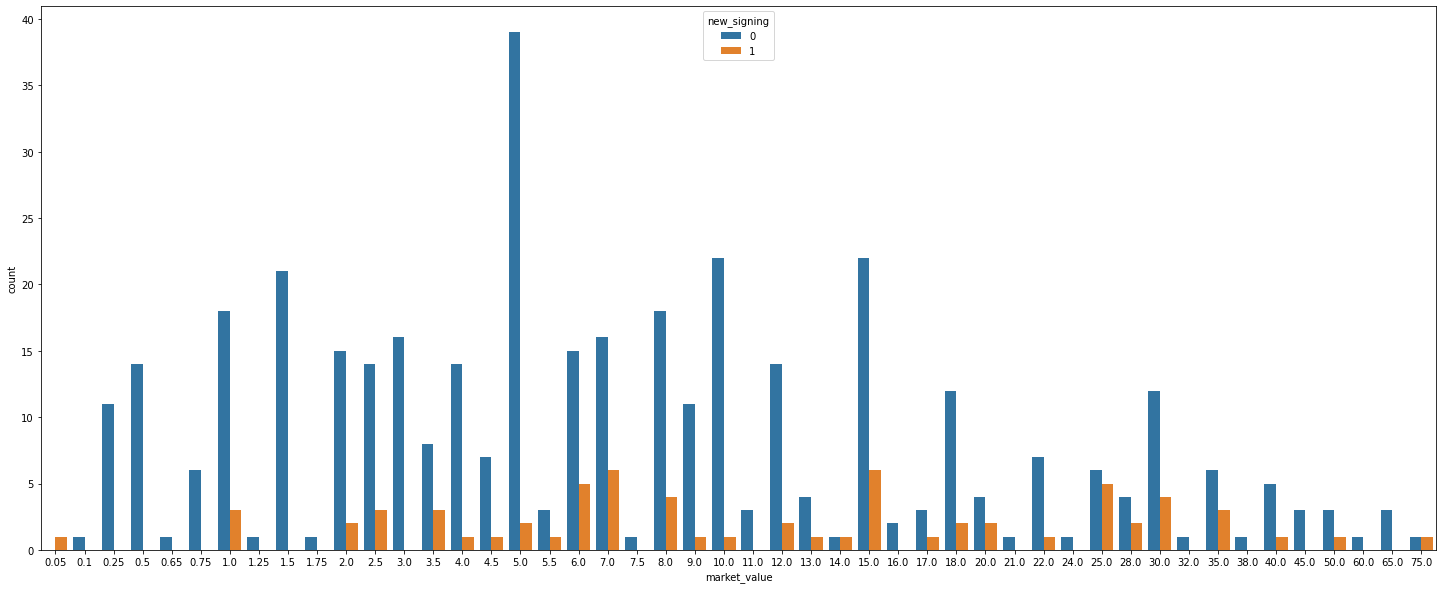

In [17]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(x="market_value",hue="new_signing",data=data)

<AxesSubplot:xlabel='region', ylabel='count'>

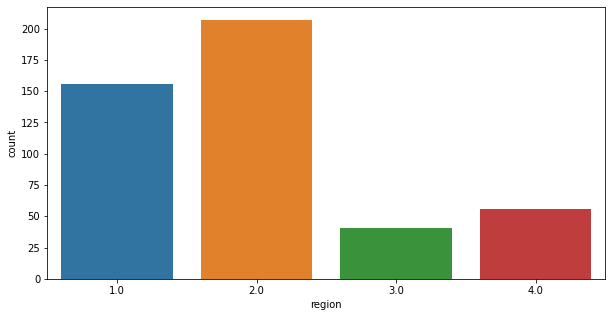

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="region",data=data)

<AxesSubplot:xlabel='age_cat', ylabel='count'>

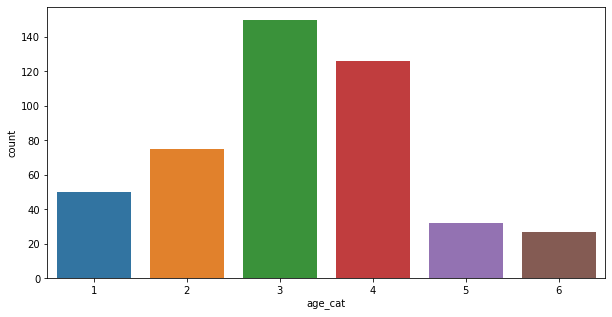

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="age_cat",data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

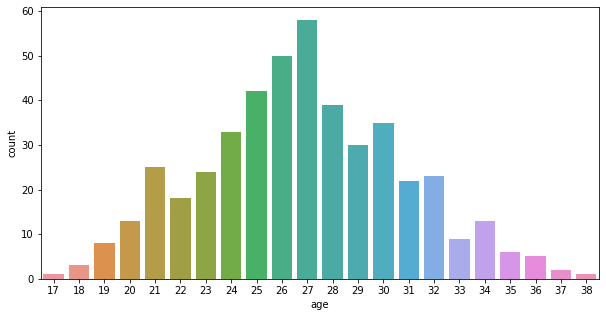

In [20]:
 fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x="age",data=data)

<AxesSubplot:>

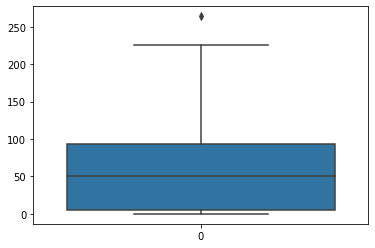

In [21]:
sns.boxplot(data=data["fpl_points"])

<AxesSubplot:>

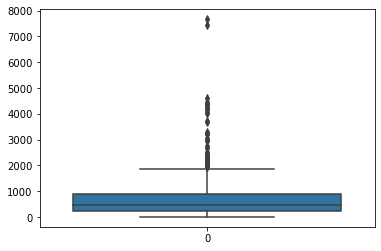

In [22]:
sns.boxplot(data=data["page_views"])

# Preprocessing: Shuffle the data before spliting for training it.  

In [23]:
from sklearn.utils import shuffle

In [24]:
data=pd.read_csv("C:/Users/User/Downloads/dataset.csv")

In [25]:
data=data.dropna()

In [26]:
data_train=shuffle(data)

In [27]:
data_train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
207,Leonardo Ulloa,Leicester+City,30,CF,1,6.0,472,5.0,0.20%,24,2.0,Argentina,0,4,9,0,0
387,Mousa Dembele,Tottenham,30,CM,2,18.0,1161,5.0,1.80%,76,2.0,Belgium,0,4,17,1,0
155,Ademola Lookman,Everton,19,LW,1,5.0,1387,5.5,0.30%,16,1.0,England,0,1,7,0,0
427,James Morrison,West+Brom,31,CM,2,5.0,238,5.5,0.00%,84,2.0,Scotland,0,4,19,0,0
12,Jack Wilshere,Arsenal,25,CM,2,18.0,1759,5.5,0.00%,61,1.0,England,0,3,1,1,0


# Define the Input and Output sets

In [28]:
X = data.drop(columns=["name","club","age","nationality","position","club_id","market_value","fpl_sel"])
y = data["market_value"]

In [29]:
X.dtypes

position_cat      int64
page_views        int64
fpl_value       float64
fpl_points        int64
region          float64
new_foreign       int64
age_cat           int64
big_club          int64
new_signing       int64
dtype: object

# MODELING 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

We modeled with and without standardization to evaluate when the model performs better. 

In [31]:
reporting={}

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [33]:
X_train

,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,big_club,new_signing
457,3,199,4.5,34,4.0,0,2,0,1
69,1,114,5.0,0,2.0,0,3,0,0
265,1,2280,7.0,102,2.0,0,4,1,0
43,2,154,4.5,44,1.0,0,4,0,0
406,2,237,4.5,48,2.0,0,5,0,0
...,...,...,...,...,...,...,...,...,...
255,2,1586,5.5,41,2.0,0,3,1,1
336,1,2656,5.0,79,1.0,0,6,0,0
295,2,566,6.0,0,2.0,0,3,0,0
267,2,1603,5.5,97,2.0,0,3,1,0


In [34]:
Xscaled= preprocessing.StandardScaler().fit(X).transform(X)

In [35]:
Xscaled

array([[-1.18433384,  3.82689912,  4.86707053, ...,  0.61890443,
         1.51185789, -0.41289643],
       [-1.18433384,  3.89777389,  3.01033438, ...,  0.61890443,
         1.51185789, -0.41289643],
       [ 1.82004245,  0.82009066,  0.03955655, ...,  2.18316838,
         1.51185789, -0.41289643],
       ...,
       [ 0.81858368, -0.60921721, -0.7031379 , ..., -0.94535951,
        -0.66143783, -0.41289643],
       [-1.18433384, -0.37941114, -0.7031379 , ..., -1.72749149,
        -0.66143783,  2.42191487],
       [-1.18433384, -0.59203545,  0.03955655, ..., -0.16322754,
        -0.66143783, -0.41289643]])

In [36]:
X_test

,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,big_club,new_signing
283,4,395,4.0,6,2.0,0,1,1,0
405,3,242,5.0,50,2.0,0,3,0,1
190,1,1753,8.5,120,4.0,0,3,0,0
253,3,935,6.0,57,2.0,0,4,1,0
145,4,623,4.5,68,2.0,0,6,0,1
...,...,...,...,...,...,...,...,...,...
138,3,1362,5.5,113,1.0,0,2,0,0
291,3,265,4.0,0,2.0,0,3,0,0
30,3,185,5.0,134,1.0,0,4,0,0
168,3,83,4.0,0,2.0,0,1,0,0


In [37]:
X_trainscaled,X_testscaled,y_trainscaled,y_testscaled=train_test_split(Xscaled,y,test_size=0.3)

# Linear Regression 

Without scaling:

In [38]:
regr = linear_model.LinearRegression()
fitregr = regr.fit(X_train, y_train)
predregrtrain = fitregr.predict(X_train)
predregrtest = fitregr.predict(X_test)

In [39]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: -20.39091948528798 and the coefficients are: [ 1.28138278e+00  2.33386087e-03  4.48967726e+00  4.17919708e-02
  6.17508686e-01  3.92405790e+00 -1.14662411e+00  7.21482269e+00
  1.74257826e+00]


After fitting the model, we printed the score between predictions and the test targets.

In [40]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square Without scaling is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square without scaling is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.7780053198359337 and the train root mean square Without scaling is: 5.812870493740399
Linear model, R2 test score is : 0.7255970259086422 and the test root mean square without scaling is: 6.309189549931181


In [41]:
reporting['Multiple Linear regression']=test_set_r2

With scaling: 

In [42]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_trainscaled, y_trainscaled)
predregrtrain=fitregr.predict(X_trainscaled)
predregrtest=fitregr.predict(X_testscaled)

In [43]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: 11.004254899271894 and the coefficients are: [ 1.1852254   2.77820042  5.15097924  2.47512443  0.79866624  0.91119518
 -1.06134242  2.82263514  0.67318174]


After fitting the model, we printed the score between predictions and the test targets.

In [44]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_trainscaled )))
train_set_r2 = r2_score(y_trainscaled, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square Without scaling is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_testscaled )))
test_set_r2 = r2_score(y_testscaled, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square without scaling is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.766320869964474 and the train root mean square Without scaling is: 6.061950463547201
Linear model, R2 test score is : 0.7668798058458753 and the test root mean square without scaling is: 5.5356567718115235


### The test scores are better with scaling than without scaling. 

# SVR regression

Without scaling: 

In [45]:
C=[100000,150000,200000,250000 ]
for i in C:
    svr_Model = SVR(C = i).fit(X_train, y_train)
    r2_train_svr = svr_Model.score(X_train, y_train)
    r2_test_svr=svr_Model.score(X_test, y_test)
    print('C = {:.2f}\n \
SVR R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(i, r2_train_svr, r2_test_svr))

C = 100000.00
 SVR R2 training: 0.80, R2 test: 0.60

C = 150000.00
 SVR R2 training: 0.82, R2 test: 0.38

C = 200000.00
 SVR R2 training: 0.84, R2 test: -0.00

C = 250000.00
 SVR R2 training: 0.84, R2 test: 0.03



Without scaling

In [46]:
svr_Model=SVR()

param = {'C' : [100000,150000,200000,250000 ]}

gridSearchSVR=GridSearchCV(svr_Model,param,scoring='r2',cv=5)
gridSearchSVR.fit(X_trainscaled,y_trainscaled)


best_SVR=gridSearchSVR.best_estimator_
bestSVR_testScore=best_SVR.score(X_testscaled,y_testscaled)

In [47]:
print('The best R2 train score is : {:.2f} with C = {:.2f}\n \
'.format(gridSearchSVR.best_score_,gridSearchSVR.best_params_['C']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestSVR_testScore,gridSearchSVR.best_params_['C']))

The best R2 train score is : -0.29 with C = 100000.00
 
The best R2 test score is : -0.82
 with Alpha = 100000.00
 


In [48]:
reporting['SVR']=gridSearchSVR.best_score_

Random Forest Regressor

In [49]:
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [400,450,480], 
         'max_depth' : [100,120,140],
         'min_samples_split':[4],
         'min_samples_leaf':[2],
         'bootstrap' : [True]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=3)
gridSearch_RandomForest.fit(X_train,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,y_test)

In [50]:
print('The best Random Forest R2 train score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_RandomForest.best_score_,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))

The best Random Forest R2 train score is : 0.68 with n estimators = 480.00, max depth : 120.00, min samples split : 4 and min samples leaf : 2  
 
The best Random Forest R2 test score is : 0.74 with n estimators = 480.00, max depth : 120.00, min samples split : 4 and min samples leaf : 2  
 


In [51]:
reporting['Random Forest Regressor']=bestRandomForest_testScore

# Extra Trees Regressor

In [52]:
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [400,450,480], 
         'max_depth' : [100,120,140],
         'min_samples_split':[4],
         'min_samples_leaf':[2],
         'bootstrap' : [True]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,y_test)

In [53]:
print('The best Random Forest R2 score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_ExtraTrees.best_score_,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))

The best Random Forest R2 score is : 0.72 with n estimators = 450.00, max depth : 140.00, min samples split : 4 and min samples leaf : 2  
 
The best Random Forest R2 test score is : 0.76 with n estimators = 450.00, max depth : 140.00, min samples split : 4 and min samples leaf : 2  
 


In [54]:
reporting['Extra Trees Regressor']=bestExtrasTrees_testScore

In [55]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [56]:
df_results=df_results.set_index('model')

In [57]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score R2
model,
Extra Trees Regressor,0.761074
Random Forest Regressor,0.738635
Multiple Linear regression,0.725597
SVR,-0.294363


### The best model after grid search is the Extra Tree regressor with a R2 score of 0.80 rounded to the nearest tenth. 

In [58]:
test=pd.read_csv("C:/Users/User/Downloads/dataset.csv")

In [59]:
test.loc[1]

name            Mesut Ozil
club               Arsenal
age                     28
position                AM
position_cat             1
market_value          50.0
page_views            4395
fpl_value              9.5
fpl_sel              5.60%
fpl_points             167
region                 2.0
nationality        Germany
new_foreign              0
age_cat                  4
club_id                  1
big_club                 1
new_signing              0
Name: 1, dtype: object

In [60]:
test=test.drop(["name","club","age","nationality","position","club_id","market_value","fpl_sel"],axis=1)

In [61]:
player=test.iloc[1,:].values
[player]

[array([1.000e+00, 4.395e+03, 9.500e+00, 1.670e+02, 2.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00])]

In [62]:
best_ExtrasTrees.predict([player])[0]

50.38447286663953

In [63]:
data.loc[1]['market_value'] 

50.0

It is evident that our prediction is very accurate. 

# Table of the Top 50 player's name, real value and prediction

In [64]:
pd.set_option('display.float_format', '{:,}'.format)

In [65]:
df_pred=pd.DataFrame(columns=['name','market_value', 'Prediction'])

In [66]:
df_pred['name']= [i for i in data[:100].name]

In [67]:
df_pred['market_value']= [round(i,0) for i in data.loc[:99]['market_value']]

In [68]:
player_stats=test.iloc[:,:].values
df_pred['Prediction']=[round(best_ExtrasTrees.predict([player])[0],0) for player in player_stats[:100]]

In [69]:
df_pred['Difference']= round(abs(df_pred['market_value']-df_pred['Prediction']),0)

In [70]:
df_pred[0:50]

,name,market_value,Prediction,Difference
0,Alexis Sanchez,65.0,58.0,7.0
1,Mesut Ozil,50.0,50.0,0.0
2,Petr Cech,7.0,15.0,8.0
3,Theo Walcott,20.0,25.0,5.0
4,Laurent Koscielny,22.0,26.0,4.0
5,Hector Bellerin,30.0,28.0,2.0
6,Olivier Giroud,22.0,34.0,12.0
7,Nacho Monreal,13.0,19.0,6.0
8,Shkodran Mustafi,30.0,28.0,2.0
9,Alex Iwobi,10.0,24.0,14.0
